In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


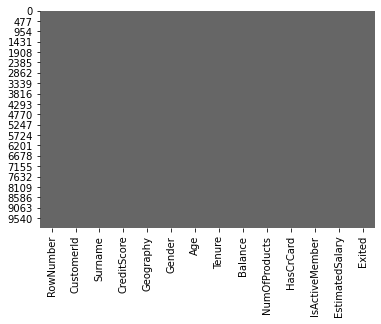

In [ ]:
sns.heatmap(df.isnull(),cbar=False,annot=False,cmap='Dark2_r')
##No values as shown in heatmap

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1,inplace=True)

In [ ]:
#label encoding 
from sklearn.preprocessing import LabelEncoder
label =LabelEncoder()
df['Geography'] =label.fit_transform(df['Geography'])
df['Gender'] =label.fit_transform(df['Gender'])

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


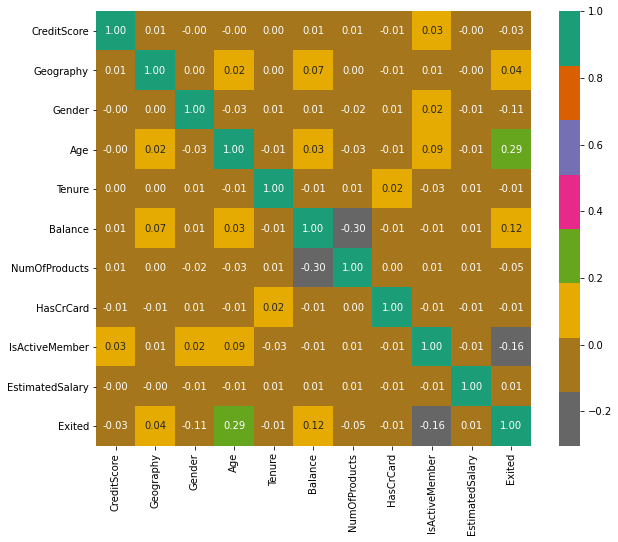

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cbar=True,square=True,annot=True,annot_kws={'size':10},fmt='.2f',cmap='Dark2_r')

In [ ]:
#independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
#train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
#scaling the given data
from sklearn.preprocessing import StandardScaler
Scaler =StandardScaler()
X_train_scale =Scaler.fit_transform(X_train)
X_test_scale =Scaler.fit_transform(X_test)

In [ ]:
#checking data is balance or not
y_train.value_counts()

0    5548
1    1452
Name: Exited, dtype: int64

In [29]:
#Balancing the target
from imblearn.under_sampling import RandomUnderSampler
sampler=RandomUnderSampler(random_state=1)
X_bal,y_bal = sampler.fit_resample(X_train_scale,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
model_B = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_B.fit(X_bal,y_bal)
y_pred = model_B.predict(X_test_scale)

In [38]:
print('Accuracy_Score :',metrics.accuracy_score(y_test,y_pred))
print('Classification_report :\n',metrics.classification_report(y_test,y_pred))
print('Confusion_matrix :\n',metrics.confusion_matrix(y_test,y_pred))

Accuracy_Score : 0.7786666666666666
Classification_report :
               precision    recall  f1-score   support

           0       0.91      0.80      0.85      2415
           1       0.45      0.68      0.54       585

    accuracy                           0.78      3000
   macro avg       0.68      0.74      0.70      3000
weighted avg       0.82      0.78      0.79      3000

Confusion_matrix :
 [[1939  476]
 [ 188  397]]


In [ ]:
#Parameters list :
base_estimator=None, n_estimators=10, 
max_samples=1.0, max_features=1.0, bootstrap=True, 
bootstrap_features=False, oob_score=False, warm_start=False, 
n_jobs=None, random_state=None, verbose=0)